In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
IMAGES_NUMBER = 5
LEARNING_RATE = 0.01

In [2]:
# image jako numpy array
def show_img(image):
  %matplotlib inline
  plt.imshow(image)
  plt.show()

In [3]:
# image jako numpy array
def noise_img(image, procent):
  noised_image = np.copy(image)
  for i in range(int(image.shape[0] * procent * 0.01)):
    rand = np.random.randint(image.shape[0])
    noised_image[rand] = image[rand] * -1
  return noised_image

# Wczytanie danych uczących

In [4]:
images = [ Image.open(f'images/{i}.png').convert('L') for i in range(IMAGES_NUMBER) ]

Dla sprawdzenia rysowanie jednego z obrazków

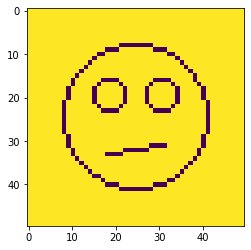

In [5]:
show_img(images[0])

Konwersja obrazka do tablicy numpy

- wczytanie z pliku
- konwersja z RGB do szarego obrazku
- wpisanie do tablicy numpy i spłaszczenie tablicy dwywymiarowej
- zamiast przechowywania kolory, przechowanie informacji 1 dla piksela czarnego oraz -1 dla białego
- rozszerzenie wektora o dodatkowe jedynki, żeby wymiary dla theta były zgodne

In [6]:
images = [ Image.open(f'images/{i}.png').convert('L') for i in range(IMAGES_NUMBER) ]
examples = [ np.where(np.asarray(images[i]).flatten() == 0, 1, -1) for i in range(IMAGES_NUMBER) ]
for i in range(IMAGES_NUMBER):
  examples[i] = np.append(examples[i], 1)
examples

[array([-1, -1, -1, ..., -1, -1,  1]),
 array([-1, -1, -1, ..., -1, -1,  1]),
 array([-1, -1, -1, ..., -1, -1,  1]),
 array([-1, -1, -1, ..., -1, -1,  1]),
 array([1, 1, 1, ..., 1, 1, 1])]

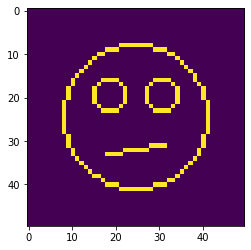

In [7]:
show_img(examples[0][:-1].reshape(50, 50))

# Idea uczenia

`W` jest wektorem wag dla wszystkich perceptronów - każdy z 2500 perceptronów ma 2501 wag (dodana theta)

In [8]:
W = np.random.rand(2500, 2501) # wagi perceptronów  
W

array([[0.48133151, 0.9963874 , 0.95584365, ..., 0.03609213, 0.27492086,
        0.58426181],
       [0.49684186, 0.32853092, 0.92277036, ..., 0.36787785, 0.0206053 ,
        0.57382444],
       [0.47372786, 0.65136792, 0.86998828, ..., 0.97674924, 0.82062708,
        0.21101273],
       ...,
       [0.2647284 , 0.3884361 , 0.9435891 , ..., 0.04080689, 0.02752637,
        0.68558579],
       [0.05181719, 0.96472253, 0.9899489 , ..., 0.90149283, 0.59321303,
        0.52597822],
       [0.11148388, 0.02313989, 0.42063629, ..., 0.33140319, 0.75880124,
        0.55744509]])

In [9]:
W.shape

(2500, 2501)

In [10]:
examples[0].shape

(2501,)

`Y` jest sumą (po wierszach) przemnożenia aktualnych wag przez wartości przykładów

In [11]:
Y = np.sum(W * examples[0], axis=1)
Y

array([-1082.52906615, -1105.83927599, -1098.94278713, ...,
       -1115.10954098, -1099.48643159, -1087.72538206])

In [12]:
Y.shape

(2500,)

`O` jest wynikiem działania funkcji aktywacji dla każdego z perceptronów

In [13]:
O = np.where(Y > 0, 1, -1)
O

array([-1, -1, -1, ..., -1, -1, -1])

Obliczenie funkcji błędu dla każdego z perceptronów

In [14]:
ERR = O - examples[0][:-1]
ERR

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
ERR.shape

(2500,)

`T` będzie wektorem, który odpowiada za uczenie - jeśli dla perceptronu `i`, `T[i] == 1` to perceptron uczy się poprawnie, w przeciwnym wypadku należy poprawić wagi

In [16]:
T = np.zeros(2500)
T

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
T[ERR == 0] = 1
T

array([1., 1., 1., ..., 1., 1., 1.])

In [18]:
for i in range(2500):
  if(T[i] == 0):
    W[i][:-1] += LEARNING_RATE * ERR[i] * examples[0][:-1]
    W[i][2500] += LEARNING_RATE * ERR[i]

# Uczenie perceptronów

In [19]:
W = np.random.rand(2500, 2501) # wagi perceptronów  
W

array([[0.23584545, 0.85630987, 0.44612577, ..., 0.30210375, 0.10363791,
        0.74253879],
       [0.06290806, 0.79258546, 0.52610369, ..., 0.53056679, 0.01825166,
        0.44064182],
       [0.51801136, 0.43951229, 0.70672233, ..., 0.48366068, 0.42958707,
        0.63977726],
       ...,
       [0.11928203, 0.38905637, 0.7743569 , ..., 0.66319066, 0.53129524,
        0.82376857],
       [0.77061512, 0.72737501, 0.71735988, ..., 0.7121916 , 0.7975909 ,
        0.2412258 ],
       [0.4920352 , 0.76425598, 0.90379158, ..., 0.60548287, 0.93977841,
        0.00960486]])

In [20]:
for iterator in range(1000):                                                    # ile razy uczyć
  i = np.random.randint(0, IMAGES_NUMBER)                                       # dla każdego obrazka
  Y = np.dot(W, examples[i])                                                    # wynik funkcji sum(dot(wagi * przykład))
  O = np.where(Y > 0, 1, -1)                                                    # funkcja aktywacji
  ERR = examples[i][:-1] - O                                                    # bład dla poszczegolnych wartości
  # T = np.zeros(2500)                                                          
  # T[ERR == 0] = 1                                                             # tablica wyników - 1 poprawne, 0 niepoprawne
  for j in range(2500):                                                         # dla wszystkich perceptronów
    if ERR[j] != 0:                                                             # jesli błędny wynik
      W[j] += LEARNING_RATE * ERR[j] * examples[i]                              # zmień wagi

In [21]:
W

array([[0.23584545, 0.85630987, 0.44612577, ..., 0.30210375, 0.10363791,
        0.74253879],
       [0.06290806, 0.79258546, 0.52610369, ..., 0.53056679, 0.01825166,
        0.44064182],
       [0.51801136, 0.43951229, 0.70672233, ..., 0.48366068, 0.42958707,
        0.63977726],
       ...,
       [0.11928203, 0.38905637, 0.7743569 , ..., 0.66319066, 0.53129524,
        0.82376857],
       [0.77061512, 0.72737501, 0.71735988, ..., 0.7121916 , 0.7975909 ,
        0.2412258 ],
       [0.4920352 , 0.76425598, 0.90379158, ..., 0.60548287, 0.93977841,
        0.00960486]])

# Test działania

Stworzenie zaszumionego obrazka

In [22]:
noised_img = noise_img(examples[1][:-1], 50)
noised_img = np.append(noised_img, 1)
noised_img

array([-1,  1, -1, ...,  1,  1,  1])

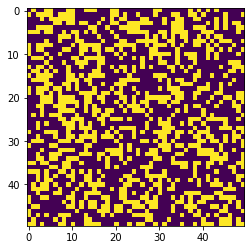

In [23]:
show_img(noised_img[:-1].reshape(50, 50))

Odszumianie

In [24]:
Y_test = np.dot(W, noised_img)
Y_test

array([-232.23237668, -235.15429677, -226.55969814, ..., -243.22987485,
       -231.44209045, -249.57651274])

In [25]:
O = np.where(Y_test > 0, 1, -1)
O.reshape(50, 50)

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

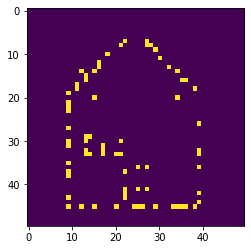

In [26]:
show_img(O.reshape(50, 50))

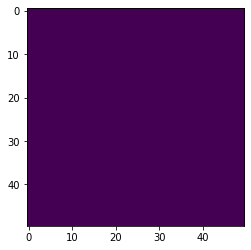

In [27]:
Y_test2 = np.dot(W[:, :-1], O)
O2 = np.where(Y_test2 > 0, 1, -1)
show_img(O2.reshape(50, 50))